In [ ]:
# importing important libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 1 importing dataset
# df = pd.read_csv("https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv")
# df.to_csv("C://Users//BIKASH//Desktop/Data.csv",index=False)

In [ ]:
df = pd.read_csv("C://Users//BIKASH//Desktop/Data.csv")
df = pd.DataFrame(df)
df.head()

2. High Level Data Understanding:
a. Find no. of rows & columns in the dataset
b. Data types of columns.
c. Info & describe of data in dataframe.

In [ ]:
# a. Find no. of rows & columns in the dataset
df_1= df.copy()
print(f'No. of rows in dataset : {df_1.shape[0]}') # no. of rows
print(f'\nNo. of columns in dataset : {df_1.shape[1]}') # no. of columns

In [ ]:
# b. Data types of columns.
print(f'Datatype of columns\n{df_1.dtypes}')

In [ ]:
# solution2
for i in df_1.columns:
    print (f"{i} = {np.dtype(df_1[i])}\n")

In [ ]:
# c. Info & describe of data in dataframe.
print(f'Info of the Dataset{df_1.info()}')
print(f'\nDescription of the Dataset\n{df_1.describe(include="all")}')

3. Low Level Data Understanding :
a. Find count of unique values in location column.
b. Find which continent has maximum frequency using values
counts.
c. Find maximum & mean value in 'total_cases'.
d. Find 25%,50% & 75% quartile value in 'total_deaths'.
e. Find which continent has maximum
'human_development_index'.
f. Find which continent has minimum 'gdp_per_capita'

In [ ]:
# a. Find count of unique values in location column.
df_3 = df.copy()
print(f"count of uniquie values in location column is {len(df_3['location'].value_counts())}")

In [ ]:
# b. Find which continent has maximum frequency using values counts.
print(f"\ncontinent having maximum frequency is {df_3['continent'].value_counts().idxmax()}")

In [ ]:
# c. Find maximum & mean value in 'total_cases'.
print('the maximum value in total cases is',df_3['total_cases'].max())
print('\nthe mean value in total_cases is',round(df_3['total_cases'].mean(),2))

In [ ]:
# d. Find 25%,50% & 75% quartile value in 'total_deaths'.
print(df_3['total_deaths'].quantile([0.25,0.5,0.75]))

In [ ]:
# Solution2
print(f"25% of total_death_values : {df_3['total_deaths'].quantile(q=.25)}")
print(f"50% of total_death_values : {df_3['total_deaths'].quantile(q=.5)}")
print(f"75% of total_death_values : {df_3['total_deaths'].quantile(q=.75)}")

In [ ]:
# e.Find which continent has maximum'human_development_index'.
print(df_3.groupby('continent')['human_development_index'].max().idxmax())

In [ ]:
# solution2
print(df_3.groupby('continent')['human_development_index'].max().sort_values().tail(1))

In [ ]:
# solution3
print(df_3.groupby('continent')['human_development_index'].max().sort_values(ascending=False).head(1))

In [ ]:
# f. Find which continent has minimum 'gdp_per_capita'
print(df_3.groupby('continent')['gdp_per_capita'].min().idxmin())

In [ ]:
# solution2
print(df_3.groupby('continent')['gdp_per_capita'].min().sort_values().head(1))

In [ ]:
# solution3
print(df_3.groupby('continent')['gdp_per_capita'].min().sort_values(ascending=False).tail(1))

4. Filter the dataframe with only this columns
['continent','location','date','total_cases','total_deaths''gdp_per_capita','human_development_index'] 
and update the data frame.

In [ ]:
df_4 = df.copy()

In [ ]:
# filtering values where continrnt is asia and total_death_cases greater than 5000
print(df_4[(df_4['continent']=='Asia')&(df_4['total_deaths']>5000)])

In [ ]:
# filtering data where gdp_per_capita is greater than 1500 and human_development_index is maximum
print(df_4[(df_4['gdp_per_capita']>1500) & (df_4['human_development_index']==max(df_4['human_development_index']))])


In [ ]:
# filtering data where continents are asia and africa with notnull values and location starts with C.
print (df_4.query("continent.isin(['Asia','Africa']).notnull() and location.str.startswith('C')"))

In [ ]:
# filtering dataset where total_cases equals to total_deaths
print(df_4[df_4['total_cases']==df_4['total_deaths']])

In [ ]:
print(df_4.sort_values(by=['continent','location','total_deaths']).nsmallest(5,['human_development_index']))

5. Data Cleaning
a. Remove all duplicates observations
b. Find missing values in all columns
c. Remove all observations where continent column value is missing
Tip : using subset parameter in dropna
d. Fill all missing values with 0

In [ ]:
# a. Remove all duplicates observations
df_5 = df.copy()
df_5=df_5.drop_duplicates()
print(df_5)
df_5.shape

In [ ]:
# b. Find missing values in all columns
df_missing = df.copy()
print(f"missing values in all columns\n{df_missing.isna().sum()}")

In [ ]:
# solution2
print(f"missing values in all columns\n{df_missing.isnull().sum()}")

In [415]:
# c. Remove all observations where continent column value is missing
df_remove_dup = df.copy()
df_remove_dup = df_remove_dup.dropna(how='all',subset='continent')
print(f"after removing all observations where continent column value is missing\n{df_remove_dup}")

after removing all observations where continent column value is missing
      iso_code continent     location      date  total_cases  new_cases  \
0          AFG      Asia  Afghanistan  31/12/19          NaN        0.0   
1          AFG      Asia  Afghanistan  01/01/20          NaN        0.0   
2          AFG      Asia  Afghanistan  02/01/20          NaN        0.0   
3          AFG      Asia  Afghanistan  03/01/20          NaN        0.0   
4          AFG      Asia  Afghanistan  04/01/20          NaN        0.0   
...        ...       ...          ...       ...          ...        ...   
56743      ZWE    Africa     Zimbabwe  13/11/20       8696.0       29.0   
56744      ZWE    Africa     Zimbabwe  14/11/20       8765.0       69.0   
56745      ZWE    Africa     Zimbabwe  15/11/20       8786.0       21.0   
56746      ZWE    Africa     Zimbabwe  16/11/20       8786.0        0.0   
56747      ZWE    Africa     Zimbabwe  17/11/20       8897.0      111.0   

       new_cases_smoothed  

In [416]:
# d. Fill all missing values with 0
df_fill = df.copy()
df_fill=df_fill.fillna(0)
print(f"after filling null values with 0\n{df_fill}")

after filling null values with 0
      iso_code continent       location      date  total_cases  new_cases  \
0          AFG      Asia    Afghanistan  31/12/19          0.0        0.0   
1          AFG      Asia    Afghanistan  01/01/20          0.0        0.0   
2          AFG      Asia    Afghanistan  02/01/20          0.0        0.0   
3          AFG      Asia    Afghanistan  03/01/20          0.0        0.0   
4          AFG      Asia    Afghanistan  04/01/20          0.0        0.0   
...        ...       ...            ...       ...          ...        ...   
57389        0         0  International  13/11/20        696.0        0.0   
57390        0         0  International  14/11/20        696.0        0.0   
57391        0         0  International  15/11/20        696.0        0.0   
57392        0         0  International  16/11/20        696.0        0.0   
57393        0         0  International  17/11/20        696.0        0.0   

       new_cases_smoothed  total_deaths  n

6. Date time format :
a. Convert date column in datetime format using
pandas.to_datetime
b. Create new column month after extracting month data from date colum

In [417]:
# a. Convert date column in datetime format using pandas.to_datetime
df_date = df.copy()
df_date['date'] = pd.to_datetime(df_date['date'])
print(df_date['date'].dtype)

datetime64[ns]


In [418]:
# b. Create new column month after extracting month data from date column
df_date['month']=df_date['date'].dt.month
print(df_date.head())

  iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2019-12-31          NaN        0.0   
1      AFG      Asia  Afghanistan 2020-01-01          NaN        0.0   
2      AFG      Asia  Afghanistan 2020-02-01          NaN        0.0   
3      AFG      Asia  Afghanistan 2020-03-01          NaN        0.0   
4      AFG      Asia  Afghanistan 2020-04-01          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
0              NaN                597.

7. Data Aggregation:
a. Find max value in all columns using groupby function on
'continent'
column
Tip: use reset_index() after applying groupby
b. Store the result in a new dataframe named 'df_groupby'.
(Use df_groupby dataframe for all further analysis)

In [447]:
# a. Find max value in all columns using groupby function on 'continent'
df_agg= df.copy()
df_agg=df_agg.groupby(by='continent').max().reset_index().max()
print(f"max value in all columns via continent\n{df_agg}")

max value in all columns via continent
continent                             South America
iso_code                                        ZWE
location                                   Zimbabwe
date                                       31/12/19
total_cases                              11205486.0
new_cases                                  184813.0
new_cases_smoothed                       156419.143
total_deaths                               247220.0
new_deaths                                   4928.0
new_deaths_smoothed                        2715.143
total_cases_per_million                   76541.772
new_cases_per_million                      8652.658
new_cases_smoothed_per_million             2472.188
total_deaths_per_million                   1248.014
new_deaths_per_million                      215.382
new_deaths_smoothed_per_million               63.14
reproduction_rate                              6.72
icu_patients                                15130.0
icu_patients_per_million 

In [448]:
# b. Store the result in a new dataframe named 'df_groupby'.(Use df_groupby dataframe for all further analysis)
df_groupby=df_1.groupby('continent').max().reset_index().max()
display(df_groupby)

continent                             South America
iso_code                                        DZA
location                                  Australia
date                                       31/12/19
total_cases                                     2.0
new_cases                                       2.0
new_cases_smoothed                              NaN
total_deaths                                    NaN
new_deaths                                      0.0
new_deaths_smoothed                             NaN
total_cases_per_million                     133.316
new_cases_per_million                       133.316
new_cases_smoothed_per_million                  NaN
total_deaths_per_million                        NaN
new_deaths_per_million                          0.0
new_deaths_smoothed_per_million                 NaN
reproduction_rate                               NaN
icu_patients                                    NaN
icu_patients_per_million                        NaN
hosp_patient

8. Feature Engineering :
a. Create a new feature 'total_deaths_to_total_cases' by ratio of
'total_deaths' column to 'total_cases'

In [437]:
# a. Create a new feature 'total_deaths_to_total_cases' by ratio of'total_deaths' column to 'total_cases'
df_new=df.copy()
df_new['total_deaths_to_total_cases']=(df_new['total_deaths']/df_new['total_cases'])
df_new.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,total_deaths_to_total_cases
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,NaN
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,NaN
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,NaN
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,NaN
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,NaN


In [ ]:
df_1['total_deaths_to_total_cases']=(df_1['total_deaths']/df['total_cases'])

In [ ]:
df_1['total_deaths_to_total_cases']

9. Data Visualization :
a. Perform Univariate analysis on 'gdp_per_capita' column by plotting histogram using seaborn dist plot.
b. Plot a scatter plot of 'total_cases' & 'gdp_per_capita'
c. Plot Pairplot on df_groupby dataset.
d. Plot a bar plot of 'continent' column with 'total_cases' .
Tip : using kind='bar' in seaborn catplot

C:\Users\BIKASH\AppData\Local\Temp\ipykernel_3320\2381501448.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['gdp_per_capita'],label="GDP_Per_Capita",color="blue",)


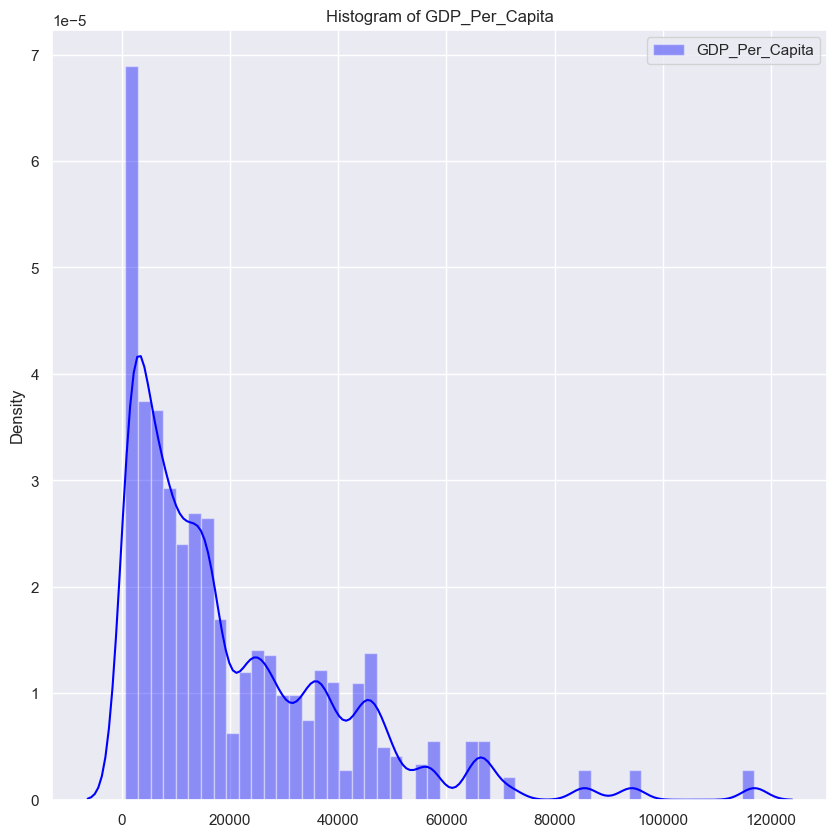

In [449]:
# a. Perform Univariate analysis on 'gdp_per_capita' column by plotting histogram using seaborn dist plot.
plt.figure(figsize=(10,10))
sns.set()
sns.distplot(x=df['gdp_per_capita'],label="GDP_Per_Capita",color="blue",)
plt.title('Histogram of GDP_Per_Capita')
plt.legend()


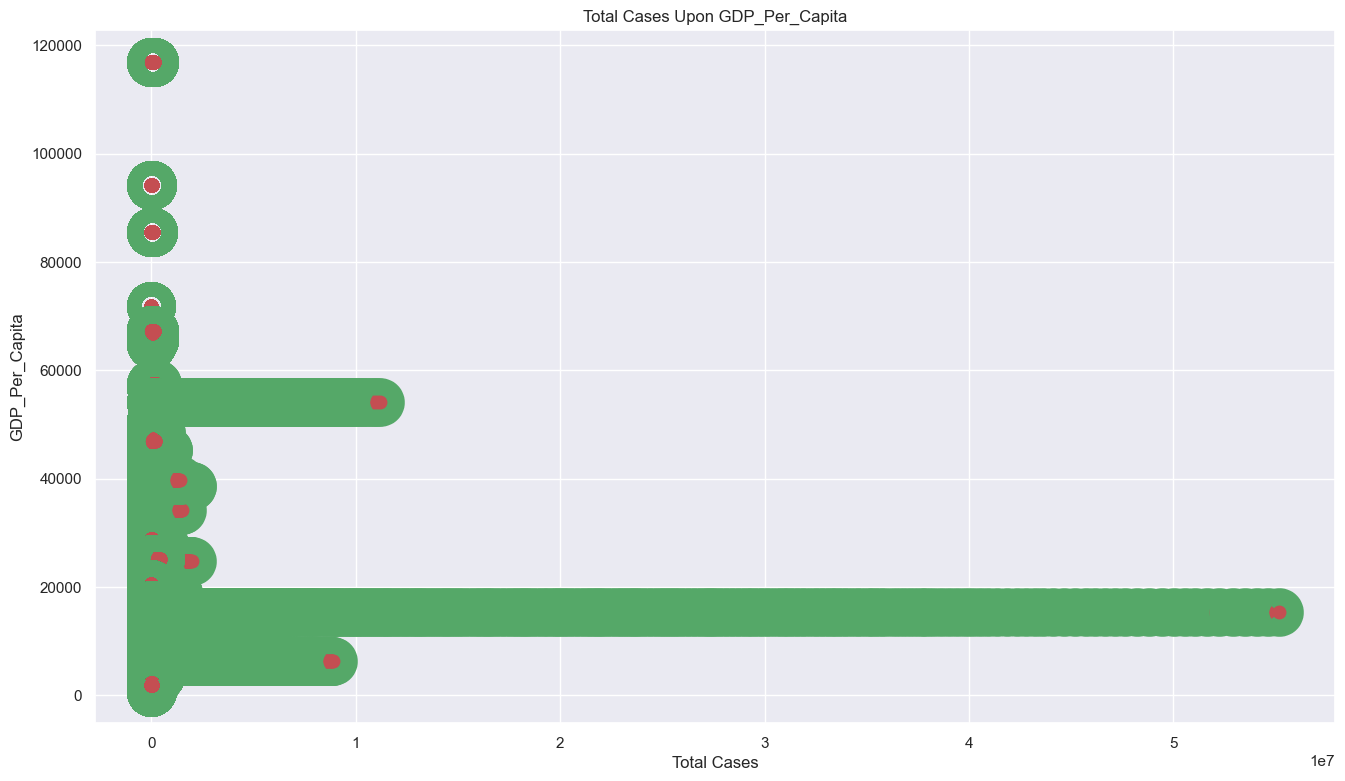

In [451]:
# b. Plot a scatter plot of 'total_cases' & 'gdp_per_capita'
plt.figure(figsize=(16,9))
sns.set()
sns.scatterplot(x=df['total_cases'], y=df['gdp_per_capita'], c='r',s=100, edgecolor = 'g', linewidth = 25,)
plt.xlabel('Total Cases',)
plt.ylabel('GDP_Per_Capita')
plt.title('Total Cases Upon GDP_Per_Capita')
plt.show()


In [452]:
# c. Plot Pairplot on df_groupby dataset.
df_groupby = pd.DataFrame(df_groupby)
plt.figure(figsize=(16,9))
sns.set()
sns.pairplot(df_groupby)


ValueError: No variables found for grid columns.

<Figure size 1600x900 with 0 Axes>

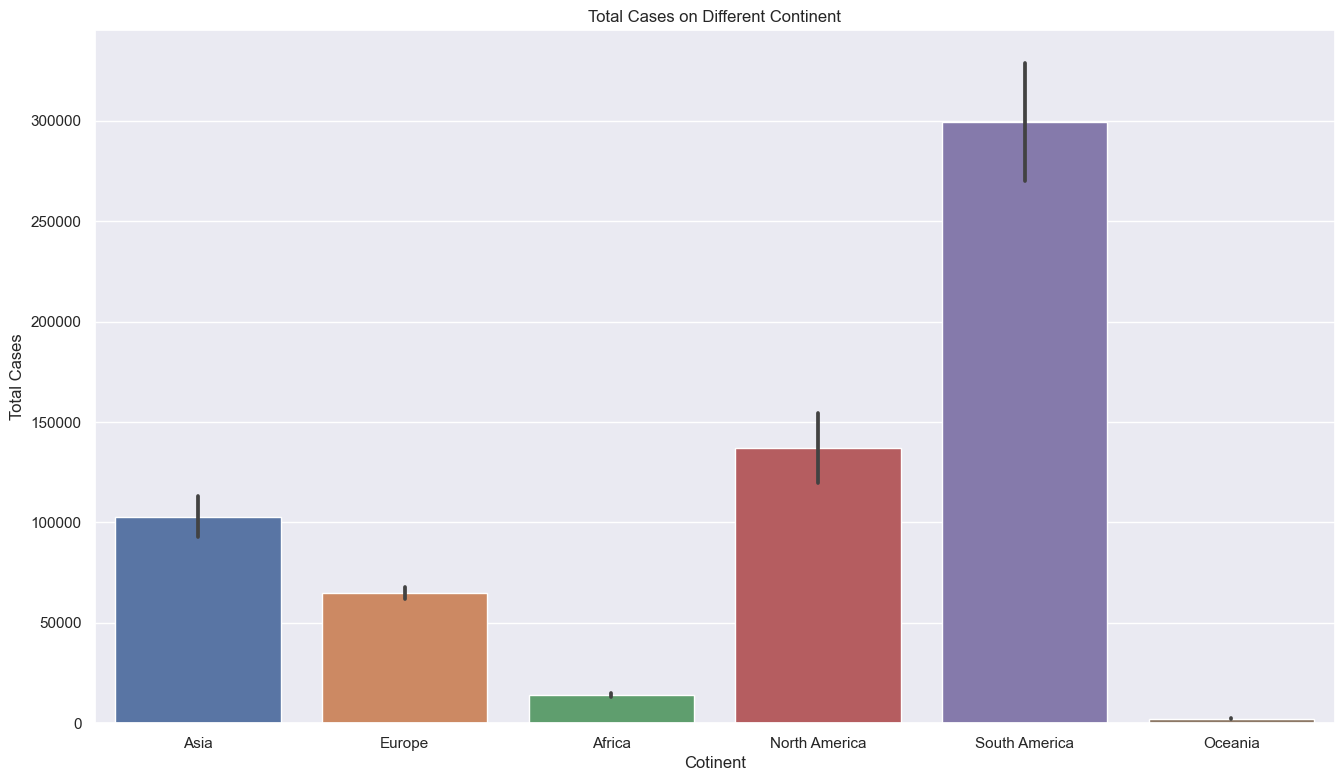

In [453]:
# d. Plot a bar plot of 'continent' column with 'total_cases' .
sns.set()
plt.figure(figsize=(16,9))
sns.barplot(x='continent',y='total_cases',data=df)
plt.xlabel('Cotinent')
plt.ylabel('Total Cases')
plt.title('Total Cases on Different Continent')
plt.show()

10.Save the df_groupby dataframe in your local drive using
pandas.to_csv
function .

In [ ]:
df_groupby.to_csv("C://Users//BIKASH//Desktop/Data2.csv",index=False)
